<a href="https://colab.research.google.com/github/aimiliavaitsi/Biopliastics_Sentiment_Project/blob/main/Correlation_Word_Count_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving correlation lenght emotion.xlsx to correlation lenght emotion (2).xlsx
                                             Comment  Year  Word_Count  \
0  While this is exciting and has its own applica...  2013          61   
1  I understood the part where you said "While th...  2013          12   
2  Apparently not though because it said "While t...  2013          19   
3  "peri" means "around", all words with "cardia/...  2013          77   
4  The material was for pericardium repair, not f...  2013          15   

   anticipation  joy  positive  surprise  trust  anger  negative  fear  \
0           1.0  1.0       2.0       1.0    1.0    NaN       NaN   NaN   
1           1.0  1.0       1.0       1.0    NaN    NaN       NaN   NaN   
2           1.0  1.0       1.0       1.0    NaN    NaN       NaN   NaN   
3           NaN  NaN       NaN       1.0    2.0    1.0       1.0   NaN   
4           NaN  NaN       2.0       NaN    1.0    NaN       NaN   NaN   

   sadness  disgust  
0      NaN

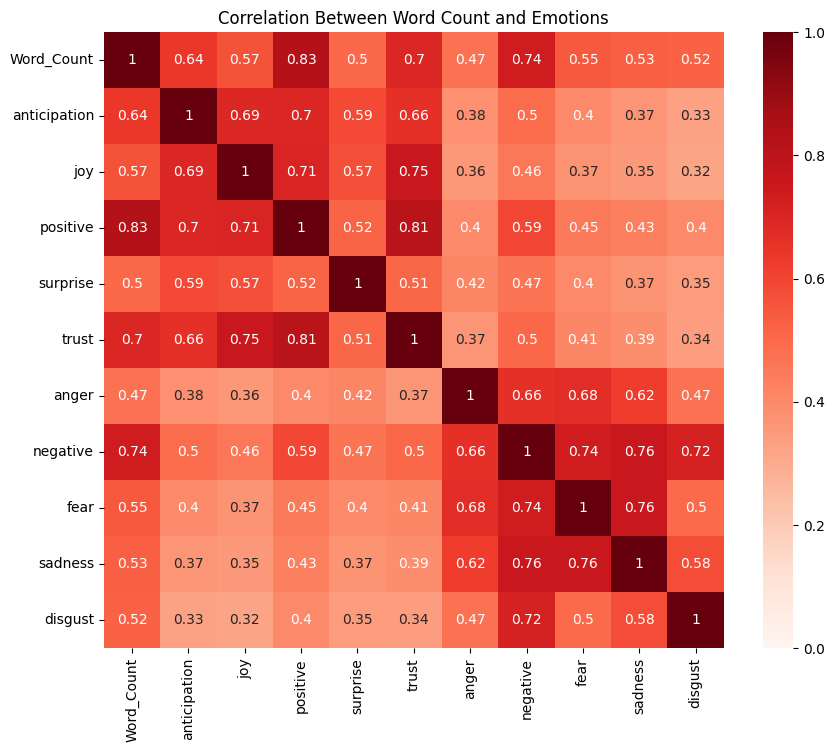

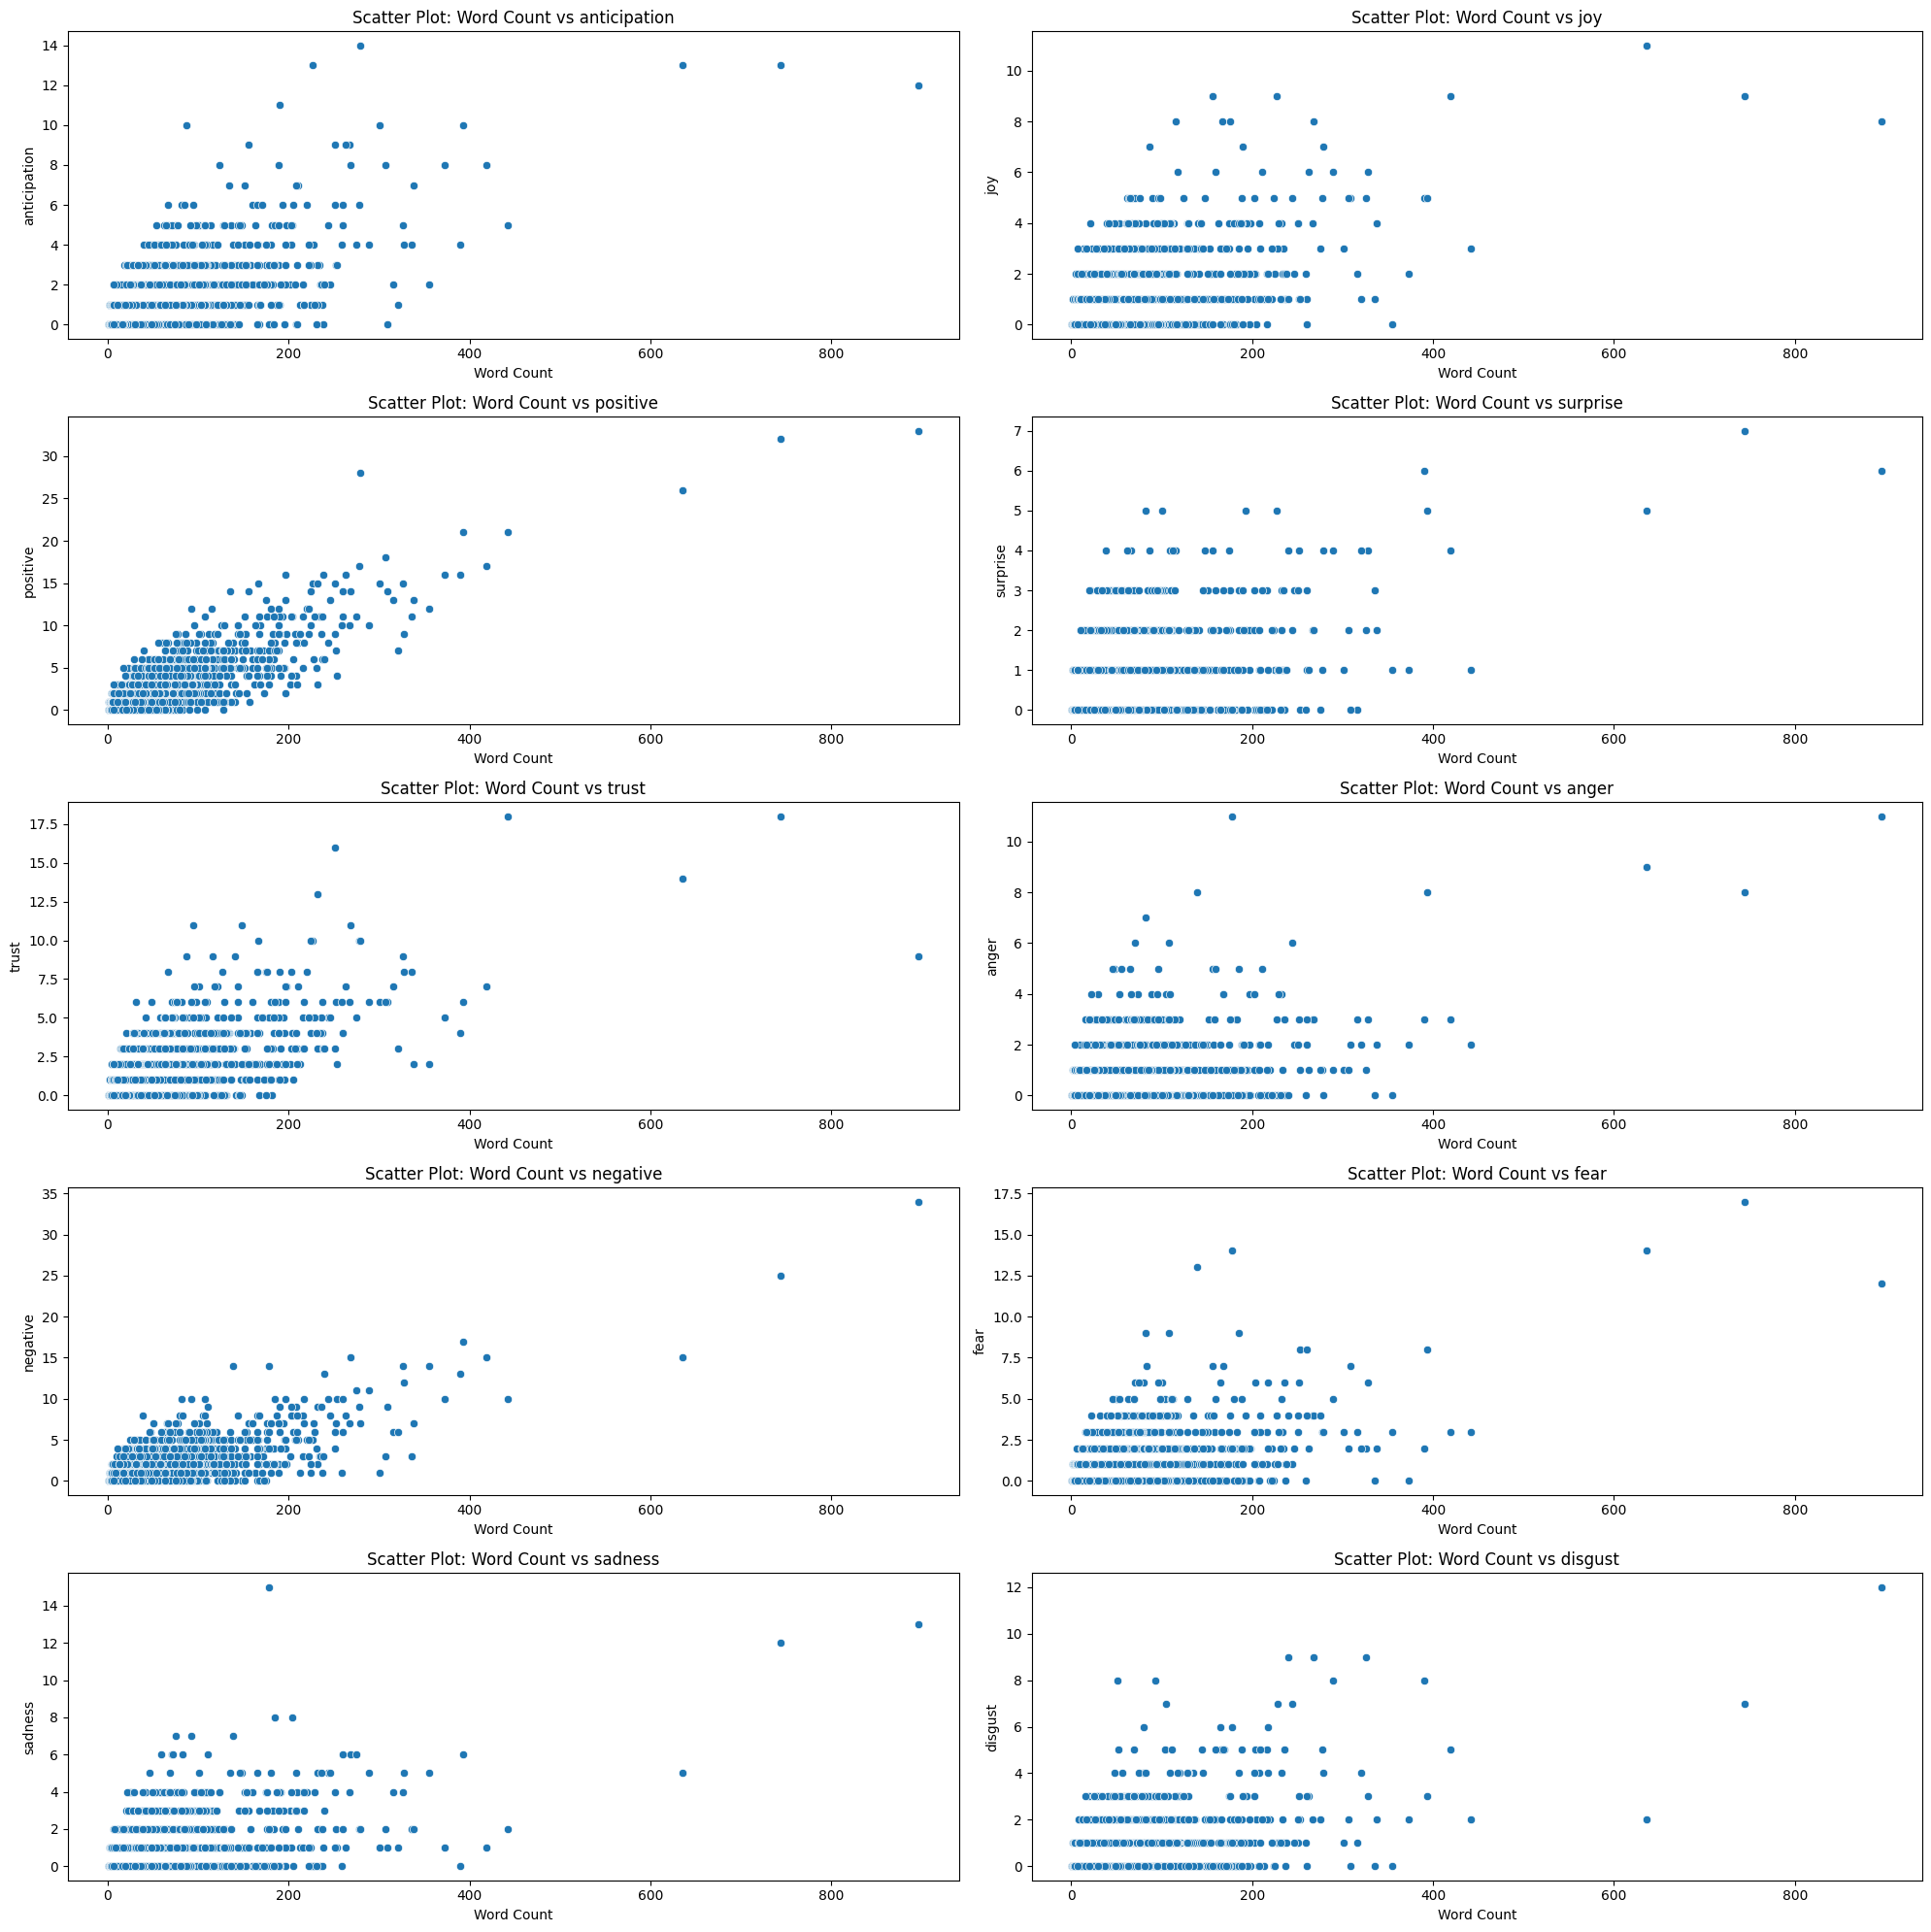

Linear Regression Coefficients (Effect of Word Count on Emotions):
              Word_Count
anticipation    0.015915
joy             0.011543
positive        0.041423
surprise        0.007090
trust           0.020939
anger           0.007875
negative        0.027026
fear            0.012390
sadness         0.010560
disgust         0.009549


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Upload your Excel file
from google.colab import files
uploaded = files.upload()

# Load the file into a DataFrame (assuming the file is .xlsx)
df = pd.read_excel(next(iter(uploaded)))

# Display the first few rows of the DataFrame
print(df.head())

# Fill missing values with 0 (to handle NaN values)
df = df.fillna(0)

# Select the relevant columns for correlation analysis
emotion_columns = ['Word_Count', 'anticipation', 'joy', 'positive', 'surprise', 'trust',
                   'anger', 'negative', 'fear', 'sadness', 'disgust']

# Calculate the correlation matrix
correlation_matrix = df[emotion_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', vmin=0, vmax=1)
plt.title('Correlation Between Word Count and Emotions')
plt.show()

# Create scatter plots to visualize the relationship between Word Count and each emotion
emotions = ['anticipation', 'joy', 'positive', 'surprise', 'trust',
            'anger', 'negative', 'fear', 'sadness', 'disgust']

plt.figure(figsize=(20, 20))
for i, emotion in enumerate(emotions):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(data=df, x='Word_Count', y=emotion)
    plt.title(f'Scatter Plot: Word Count vs {emotion}')
    plt.xlabel('Word Count')
    plt.ylabel(emotion)

plt.tight_layout()
plt.show()

# Optional: Linear regression analysis (to see if Word Count can predict emotions)
X = df[['Word_Count']]  # Feature
y = df[['anticipation', 'joy', 'positive', 'surprise', 'trust', 'anger',
        'negative', 'fear', 'sadness', 'disgust']]  # Target (emotion scores)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Display results (optional, based on your interest)
# Print out the coefficients to see how word count impacts each emotion
coefficients = pd.DataFrame(model.coef_, columns=['Word_Count'], index=y.columns)
print("Linear Regression Coefficients (Effect of Word Count on Emotions):")
print(coefficients)

# Note: You can further analyze or visualize the predicted values if needed.
